# Video Games Sales Analysis And Visualization

Their fields and data types are:

Rank - Ranking of overall sales, integer

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.), object

Year - Year of the game's release, float

Genre - Genre of the game ,object

Publisher - Publisher of the game, object

NA_Sales - Sales in North America (in millions), float

EU_Sales - Sales in Europe (in millions), float

JP_Sales - Sales in Japan (in millions), float

Other_Sales - Sales in the rest of the world (in millions), float

Global_Sales - Total worldwide sales, float

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [16]:
data=pd.read_csv('game.csv')

In [17]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [18]:
data.shape

(16598, 11)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [20]:
print("Number of games: ", len(data))
publishers = data['Publisher'].unique()
print("Number of publishers: ", len(publishers))
platforms = data['Platform'].unique()
print("Number of platforms: ", len(platforms))
genres =data['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  16598
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


In [21]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [22]:
data=data.dropna()

## 1. Which Games were made the most ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

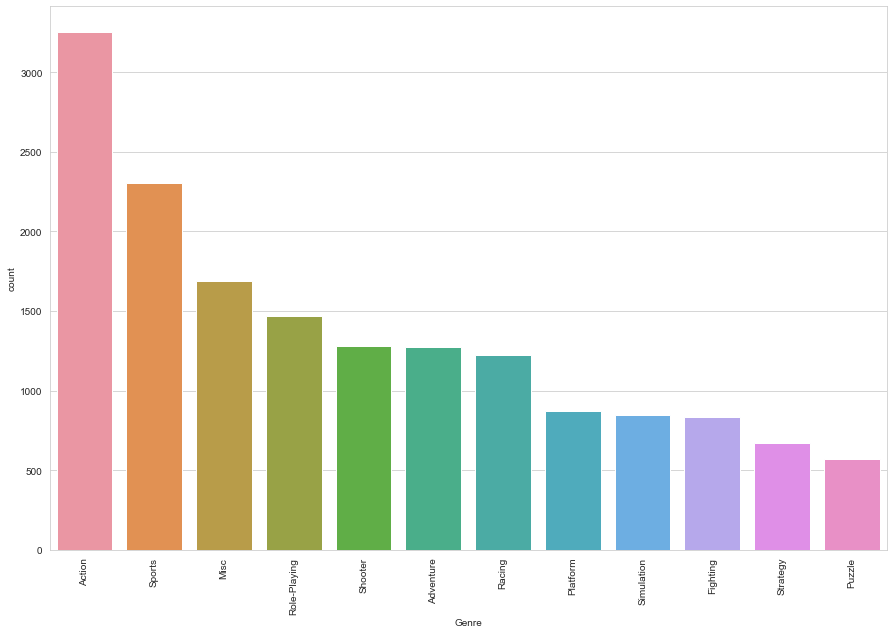

In [23]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=data, order = data['Genre'].value_counts().index)
plt.xticks(rotation=90)
#So We find out that Action Games were made the most 


In [24]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff
import plotly.graph_objects as go

uniq=data["Genre"].unique()

total_Genre = []
for i in uniq:
    total_Genre.append(len(data[data["Genre"]==i]))
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = uniq

# Create subplots: use 'domain' type for Pie subplot

#fig.add_trace(go.Pie(labels=labels, values=total_Genre, name="Genre"))

fig = go.Figure(data=[go.Pie(labels=labels, values=total_Genre, hole=.3)])
fig.update_layout(
    title_text="Total Game Count in Genre",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Genre', x=0.5, y=0.5, font_size=20, showarrow=False)])
fig.show()


### So We find out that Action Games were made the most 

## 2. From which year most number of games were made ?

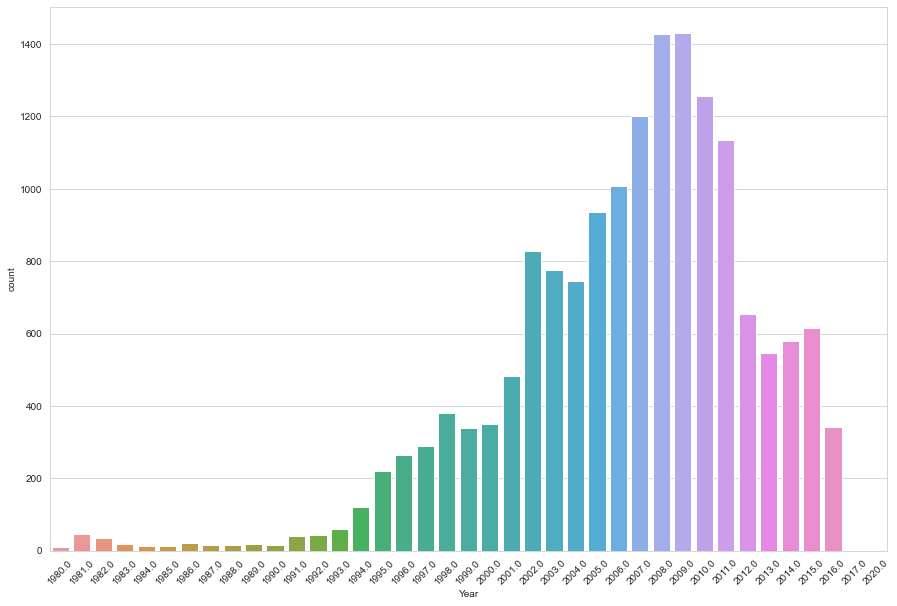

In [25]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot(data.Year)


### From Year 2000 most number of games were made maybe due to advancement in Technology

## 3. Which year had the highest sales worldwide?

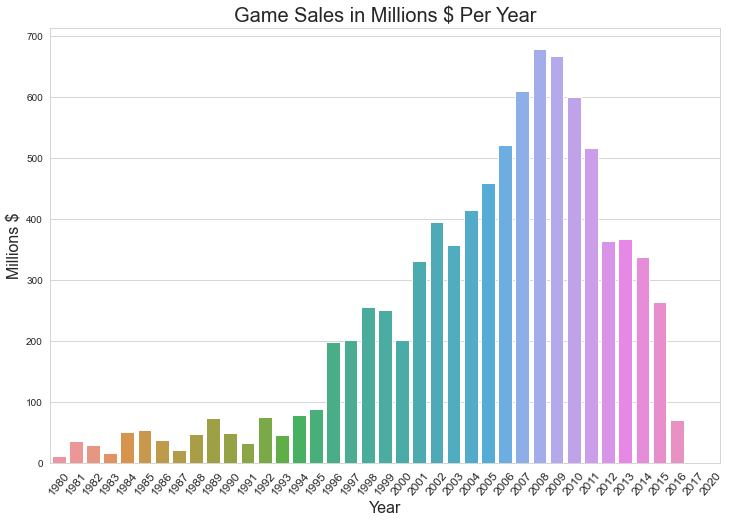

In [26]:
y = data.groupby(['Year'])['Global_Sales'].sum()
x = y.index.astype(int)
plt.figure(figsize=(12,8))
sns.barplot(y = y, x = x)
plt.xlabel(xlabel='Year', fontsize=16)
plt.xticks(fontsize=12, rotation=50)
plt.ylabel(ylabel='Millions $', fontsize=16)
plt.title(label='Game Sales in Millions $ Per Year', fontsize=20)
plt.show();

### 2006

## 4. find out for which Platform games were developed the most?

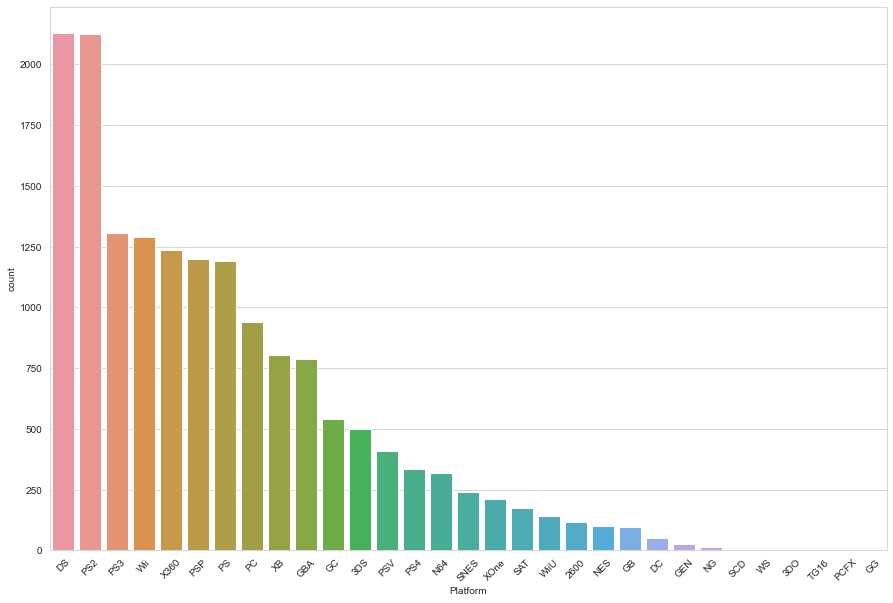

In [27]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.countplot( x="Platform", data=data, order = data['Platform'].value_counts().index)


### The winner is PS2 &DS